In [14]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axes import Axes
from matplotlib.gridspec import GridSpec
import typing as t

max_robots = 10
algs = {
    "namo": "C-NAMO Distance DR",
    "namo_ndr": "C-NAMO no DR",
    "namo_ncr": "C-NAMO no CR",
    "snamo": "S-NAMO Social DR",
    "snamo_ndr": "S-NAMO no DR",
    "snamo_ncr": "S-NAMO no CR",
}

scenario = 'intersections'
data = pandas.read_csv(f"../report_{scenario}.csv")
data["succeeded"] = data["succeeded"].astype(int)
data_successes = data[data["succeeded"] == 1]
sum_goals_per_agent_per_sim = data.groupby(['n_robots', 'algorithm', 'sim_id', 'agent_id']).sum().reset_index()
sum_goals_per_agent_per_sim['succeeded'] /= 50
avg_per_agent = sum_goals_per_agent_per_sim.drop(columns=["agent_id", "sim_id"]).groupby(['n_robots', 'algorithm']).mean()
std_per_agent = sum_goals_per_agent_per_sim.drop(columns=["agent_id", "sim_id"]).groupby(['n_robots', 'algorithm']).std()
count_per_agent = sum_goals_per_agent_per_sim.drop(columns=["agent_id", "sim_id"]).groupby(['n_robots', 'algorithm']).count()

data = data.drop(columns=["agent_id", "sim_id"])
success_rates = data.groupby(['n_robots','algorithm'])['succeeded'].mean().reset_index()


In [15]:
avg_per_agent

succeeded  distance_traveled  n_transfers  planning_time  \
n_robots algorithm                                                             
1        namo        0.968000       36291.548512    23.300000     110.556895   
         namo_ncr    0.968000       36291.548512    23.300000     107.688167   
         namo_ndr    0.968000       36291.548512    23.300000     107.300239   
         snamo       0.981000       29988.118295    19.600000     252.391477   
         snamo_ncr   0.981000       29988.118295    19.600000     252.236142   
         snamo_ndr   0.981000       29988.118295    19.600000     252.921207   
2        namo        0.929500       52378.647010    24.675000     236.760345   
         namo_ncr    0.457500       15291.111300    10.700000      96.905637   
         namo_ndr    0.756000       26884.833369    19.600000     198.303533   
         snamo       0.928000       31982.259105    17.425000     436.760621   
         snamo_ncr   0.450000       13118.933962     9.050000     349.805675   
         snamo_ndr   0.768000       24273.190327    15.250000     404.847975   
3        namo        0.857333       51964.859527    22.700000     350.502524   
         namo_ncr    0.279000        9301.415772     6.533333     114.615662   
         namo_ndr    0.559667       21690.441961    14.883333     236.568464   
         snamo       0.782000       33537.051519    13.783333     596.350334   
         snamo_ncr   0.310000        9104.153258     5.333333     411.500877   
         snamo_ndr   0.610667       20821.239438    11.250000     534.669769   
4        namo        0.772250       50764.892688    20.962500     477.921424   
         namo_ncr    0.222500        6481.421471     4.825000     102.103563   
         namo_ndr    0.475500       19276.355967    12.412500     261.716700   
         snamo       0.770250       35461.354844    12.812500     710.681405   
         snamo_ncr   0.220250        5808.622866     4.175000     414.497010   
         snamo_ndr   0.497250       17375.531040     8.725000     589.983631   
5        namo        0.709800       55796.657367    18.150000     520.271805   
         namo_ncr    0.169200        4729.207749     3.820000     107.993860   
         namo_ndr    0.366200       16568.635883     9.420000     277.876873   
         snamo       0.711200       39870.505509    11.430000     807.826687   
         snamo_ncr   0.183600        4927.131609     3.300000     449.915486   
         snamo_ndr   0.405000       15102.959540     6.630000     658.076274   
6        namo        0.619500       56615.797207    16.033333     618.873163   
         namo_ncr    0.131000        3565.627791     2.783333     110.434839   
         namo_ndr    0.277167       13405.622445     7.208333     308.126907   
         snamo       0.638167       38978.569556     9.441667     863.587403   
         snamo_ncr   0.143000        3945.942101     2.325000     435.410449   
         snamo_ndr   0.328500       11991.501358     5.466667     682.975606   
7        namo        0.516286       49555.416014    13.750000     679.438892   
         namo_ncr    0.106000        2752.401169     2.385714     114.406608   
         namo_ndr    0.217143       11552.162266     5.671429     324.430094   
         snamo       0.556000       38849.396117     8.628571     963.610564   
         snamo_ncr   0.114857        2806.162485     2.028571     449.879981   
         snamo_ndr   0.229571        9269.696578     4.300000     734.942053   
8        namo        0.457750       45986.837946    12.562500     738.782280   
         namo_ncr    0.094250        2331.192741     2.075000     106.368497   
         namo_ndr    0.185750        9280.696306     4.968750     304.137301   
         snamo       0.459625       36989.852861     7.262500    1035.537473   
         snamo_ncr   0.089250        2213.482091     1.643750     446.991849   
         snamo_ndr   0.174750        7707.711433     3.237500     752.559545   
9        namo       

In [16]:
std_per_agent

succeeded  distance_traveled  n_transfers  planning_time  \
n_robots algorithm                                                             
1        namo        0.101650       10248.030106     4.921489      18.301520   
         namo_ncr    0.101650       10248.030106     4.921489      18.052566   
         namo_ndr    0.101650       10248.030106     4.921489      19.247257   
         snamo       0.022919        4352.182971     2.562893      15.625356   
         snamo_ncr   0.022919        4352.182971     2.562893      16.346676   
         snamo_ndr   0.022919        4352.182971     2.562893      15.319258   
2        namo        0.045963       32602.870625     4.008884      77.786274   
         namo_ncr    0.140635        5421.092409     3.383216      30.264663   
         namo_ndr    0.123471        7151.929176     4.578657      65.271615   
         snamo       0.045697        6053.765504     3.350373     106.864798   
         snamo_ncr   0.206559        5377.773641     3.679116     130.013540   
         snamo_ndr   0.199733        7498.877854     4.876684     103.420819   
3        namo        0.094490       27114.579037     4.446671     128.073312   
         namo_ncr    0.178674        6221.867387     4.556488      34.740492   
         namo_ndr    0.143491        6616.632111     4.092538      58.698131   
         snamo       0.261124       18680.287604     5.171931     180.850519   
         snamo_ncr   0.194518        6572.930350     3.467362     183.055105   
         snamo_ndr   0.142969        5738.527490     3.276134     199.611005   
4        namo        0.122029       24088.166259     5.740030     169.700338   
         namo_ncr    0.162804        5187.451346     4.049613      29.235238   
         namo_ndr    0.124228        6642.604265     3.451999      70.736453   
         snamo       0.139402       12488.807893     4.293338     176.478396   
         snamo_ncr   0.172737        4521.607686     3.564150     198.183465   
         snamo_ndr   0.131158        4590.865165     2.959537     164.196341   
5        namo        0.131303       28791.955712     5.592880     124.026205   
         namo_ncr    0.118148        3527.975792     3.082633      37.502767   
         namo_ndr    0.125552        7496.143013     4.271541      84.925590   
         snamo       0.119336       12394.517001     4.097930     186.153519   
         snamo_ncr   0.162192        4113.989046     2.904194     235.659339   
         snamo_ndr   0.153646        6205.476876     3.132285     222.998810   
6        namo        0.148255       35075.035732     5.412301     142.807684   
         namo_ncr    0.116845        3422.670824     2.922481      40.378501   
         namo_ndr    0.123813        7052.094525     3.899786     104.683042   
         snamo       0.185726       19263.189129     4.160228     257.240163   
         snamo_ncr   0.137899        3678.572580     2.013244     216.122325   
         snamo_ndr   0.141294        4771.284577     2.746834     231.068904   
7        namo        0.139611       22245.474711     5.234260     175.755586   
         namo_ncr    0.096967        2784.100954     2.686459      40.029142   
         namo_ndr    0.111796        6251.354117     3.161010     101.503721   
         snamo       0.174524       14219.905842     4.283720     285.036659   
         snamo_ncr   0.112125        2717.487324     2.162276     216.678707   
         snamo_ndr   0.120346        4587.359185     2.750278     223.862855   
8        namo        0.133572       26982.900813     5.330212     139.148679   
         namo_ncr    0.092114        2353.616950     2.593048      35.264205   
         namo_ndr    0.101694        6197.939461     2.987230     100.694839   
         snamo       0.187301       16617.771892     4.121561     315.916958   
         snamo_ncr   0.086086        1966.413818     1.854272     258.775864   
         snamo_ndr   0.117168        5038.913085     2.272304     287.249256   
9        namo       

In [4]:
success_rates

,n_robots,algorithm,succeeded
0,1,namo,0.968000
1,1,namo_ncr,0.968000
2,1,namo_ndr,0.968000
3,1,snamo,0.981000
4,1,snamo_ncr,0.981000
5,1,snamo_ndr,0.981000
6,2,namo,0.929500
7,2,namo_ncr,0.457500
8,2,namo_ndr,0.756000
9,2,snamo,0.928000


In [5]:
def plot_metric_by_num_robots(
    *,
    ax: Axes,
    algs: t.Dict[str, str],
    max_robots: int,
    avg,
    std,
    ylabel: str,
    show_legend: bool = False,
    show_std: bool = False
):
    fig_legend = plt.figure("Legend")

    lines = []
    labels = []
    for alg, title in algs.items():
        means = np.array([avg.loc[(i, alg)] for i in range(1, max_robots + 1)])
        stds = np.array([std.loc[(i, alg)] for i in range(1, max_robots + 1)])
        (line,) = ax.plot(
            range(1, max_robots + 1),
            means,
            label=title,
        )
        lines.append(line)
        labels.append(title)
        if show_std:
            ax.fill_between(
                x=range(1, max_robots + 1),
                y1=means - stds,
                y2=means + stds,
                alpha=0.2,
            )
    fig_legend.legend(lines, labels, loc='center', frameon=False)
    fig_legend.savefig(f'{scenario}_legend.png', bbox_inches='tight')
    # ax.set_ylabel(ylabel)
    ax.set_xlim([1, max_robots])

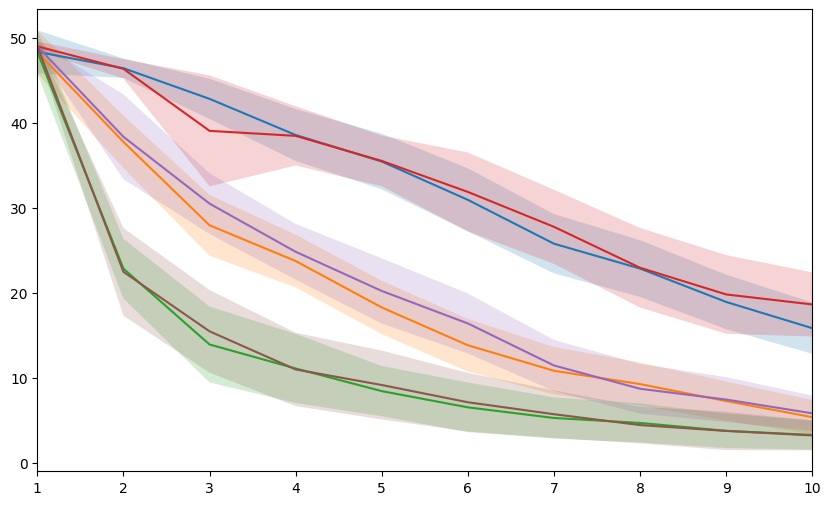

<Figure size 640x480 with 0 Axes>

In [6]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)

plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['succeeded'],
    std=std_per_agent['succeeded'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Goal Success Rate",
    show_std=True
)
fig.savefig(f'{scenario}_success_rates.png', bbox_inches='tight')

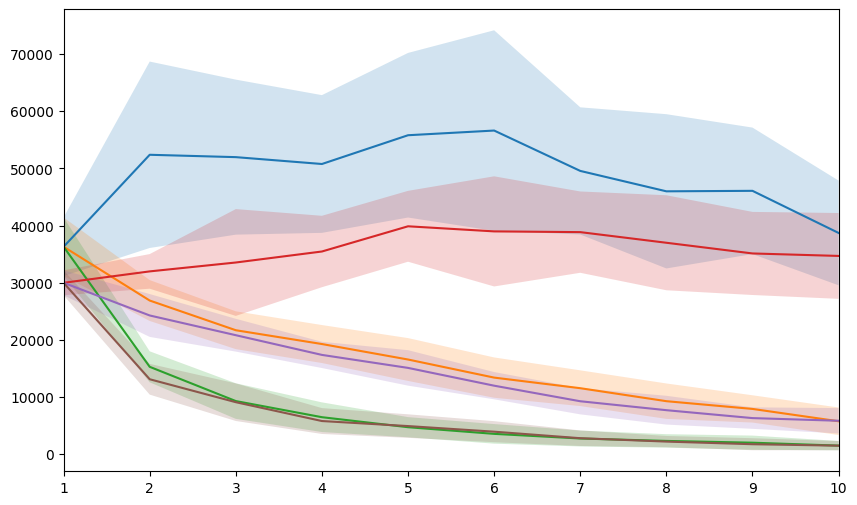

<Figure size 640x480 with 0 Axes>

In [7]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)

plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['distance_traveled'],
    std=std_per_agent['distance_traveled'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Distance",
    show_std=True
)
fig.savefig(f'{scenario}_distance.png', bbox_inches='tight')

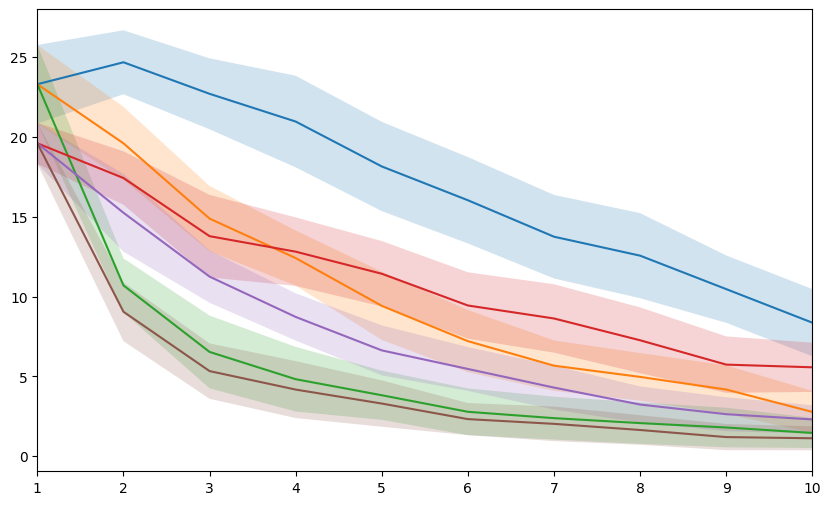

<Figure size 640x480 with 0 Axes>

In [8]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['n_transfers'],
    std=std_per_agent['n_transfers'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Num Transfers",
    show_std=True
)
fig.savefig(f'{scenario}_transfers.png', bbox_inches='tight')

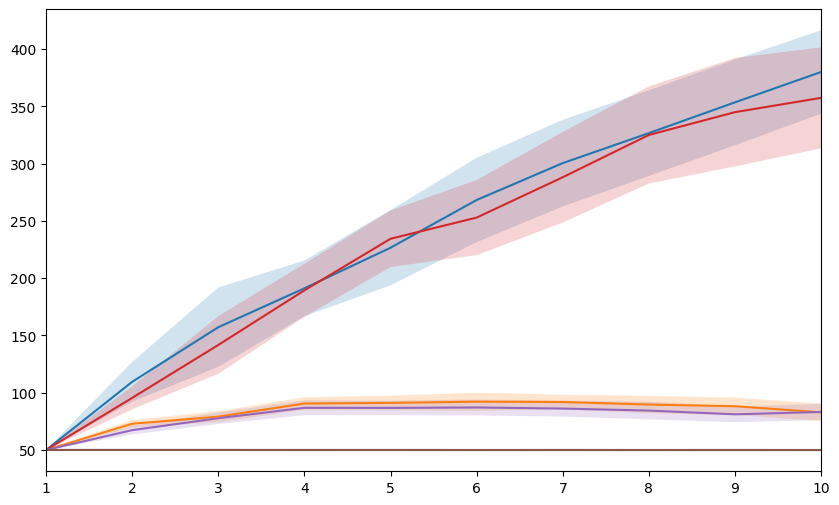

<Figure size 640x480 with 0 Axes>

In [9]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['replans'],
    std=std_per_agent['replans'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Num Replans",
    show_std=True
)
fig.savefig(f'{scenario}_replans.png', bbox_inches='tight')

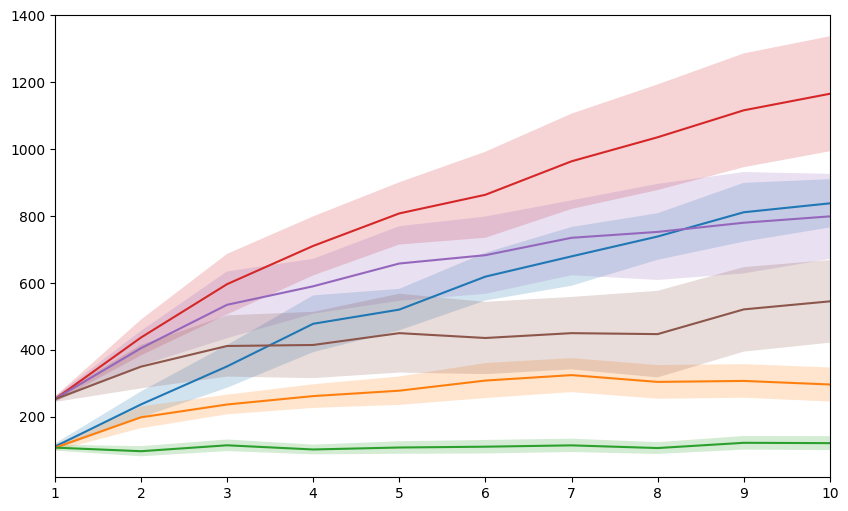

<Figure size 640x480 with 0 Axes>

In [10]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['planning_time'],
    std=std_per_agent['planning_time'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Planning Time",
    show_std=True
)
fig.savefig(f'{scenario}_planning_time.png', bbox_inches='tight')

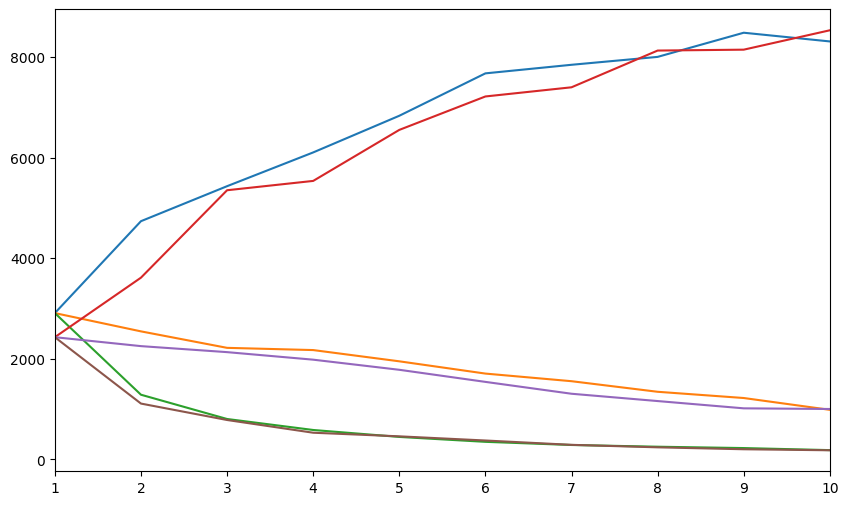

<Figure size 640x480 with 0 Axes>

In [11]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['n_steps'],
    std=std_per_agent['n_steps'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Steps",
    show_std=False
)
fig.savefig(f'{scenario}_steps.png', bbox_inches='tight')

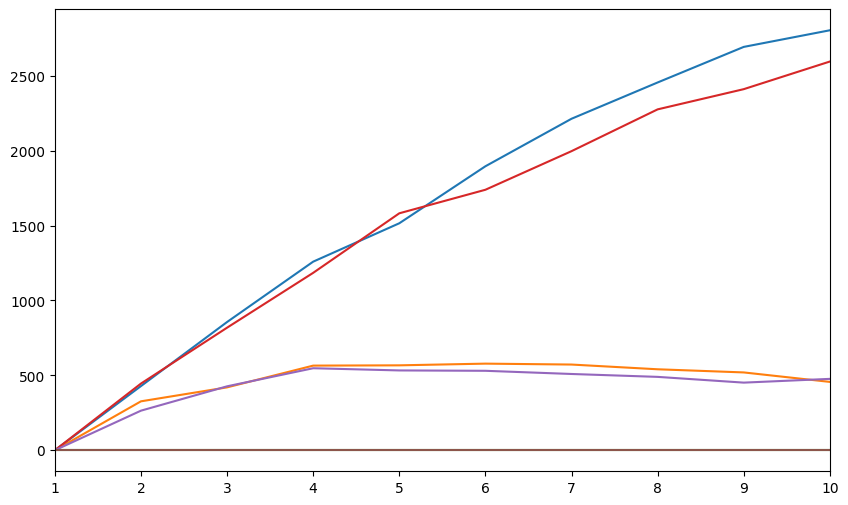

<Figure size 640x480 with 0 Axes>

In [12]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['postponements'],
    std=std_per_agent['postponements'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Postponments",
    show_std=False
)
fig.savefig(f'{scenario}_postpones.png', bbox_inches='tight')

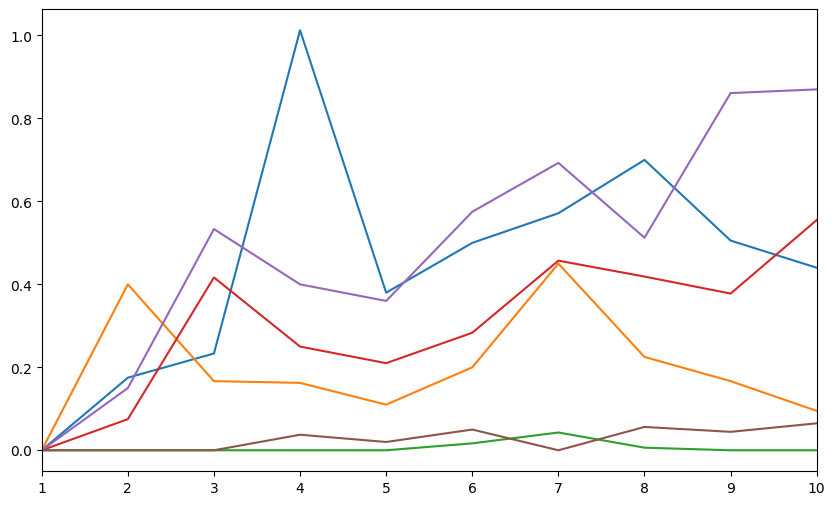

<Figure size 640x480 with 0 Axes>

In [13]:
fig = plt.figure(constrained_layout=False, figsize=(10,6))
gs = GridSpec(1, 1, figure=fig)
plot_metric_by_num_robots(
    ax=fig.add_subplot(gs[0, 0]),
    avg=avg_per_agent['n_planning_timeouts'],
    std=std_per_agent['n_planning_timeouts'] / 2,
    max_robots=max_robots,
    algs=algs,
    ylabel="Planning Timeouts",
    show_std=False
)
fig.savefig(f'{scenario}_timeouts.png', bbox_inches='tight')